<a href="https://colab.research.google.com/github/tuxlimr/Celery_Preprocessing/blob/master/Chat_gpt_prompt_engineering_deeplearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Guidelines for Prompting
In this lesson, you'll practice two prompting principles and their related tactics in order to write effective prompts for large language models.

## Setup
#### Load the API key and relevant Python libaries.

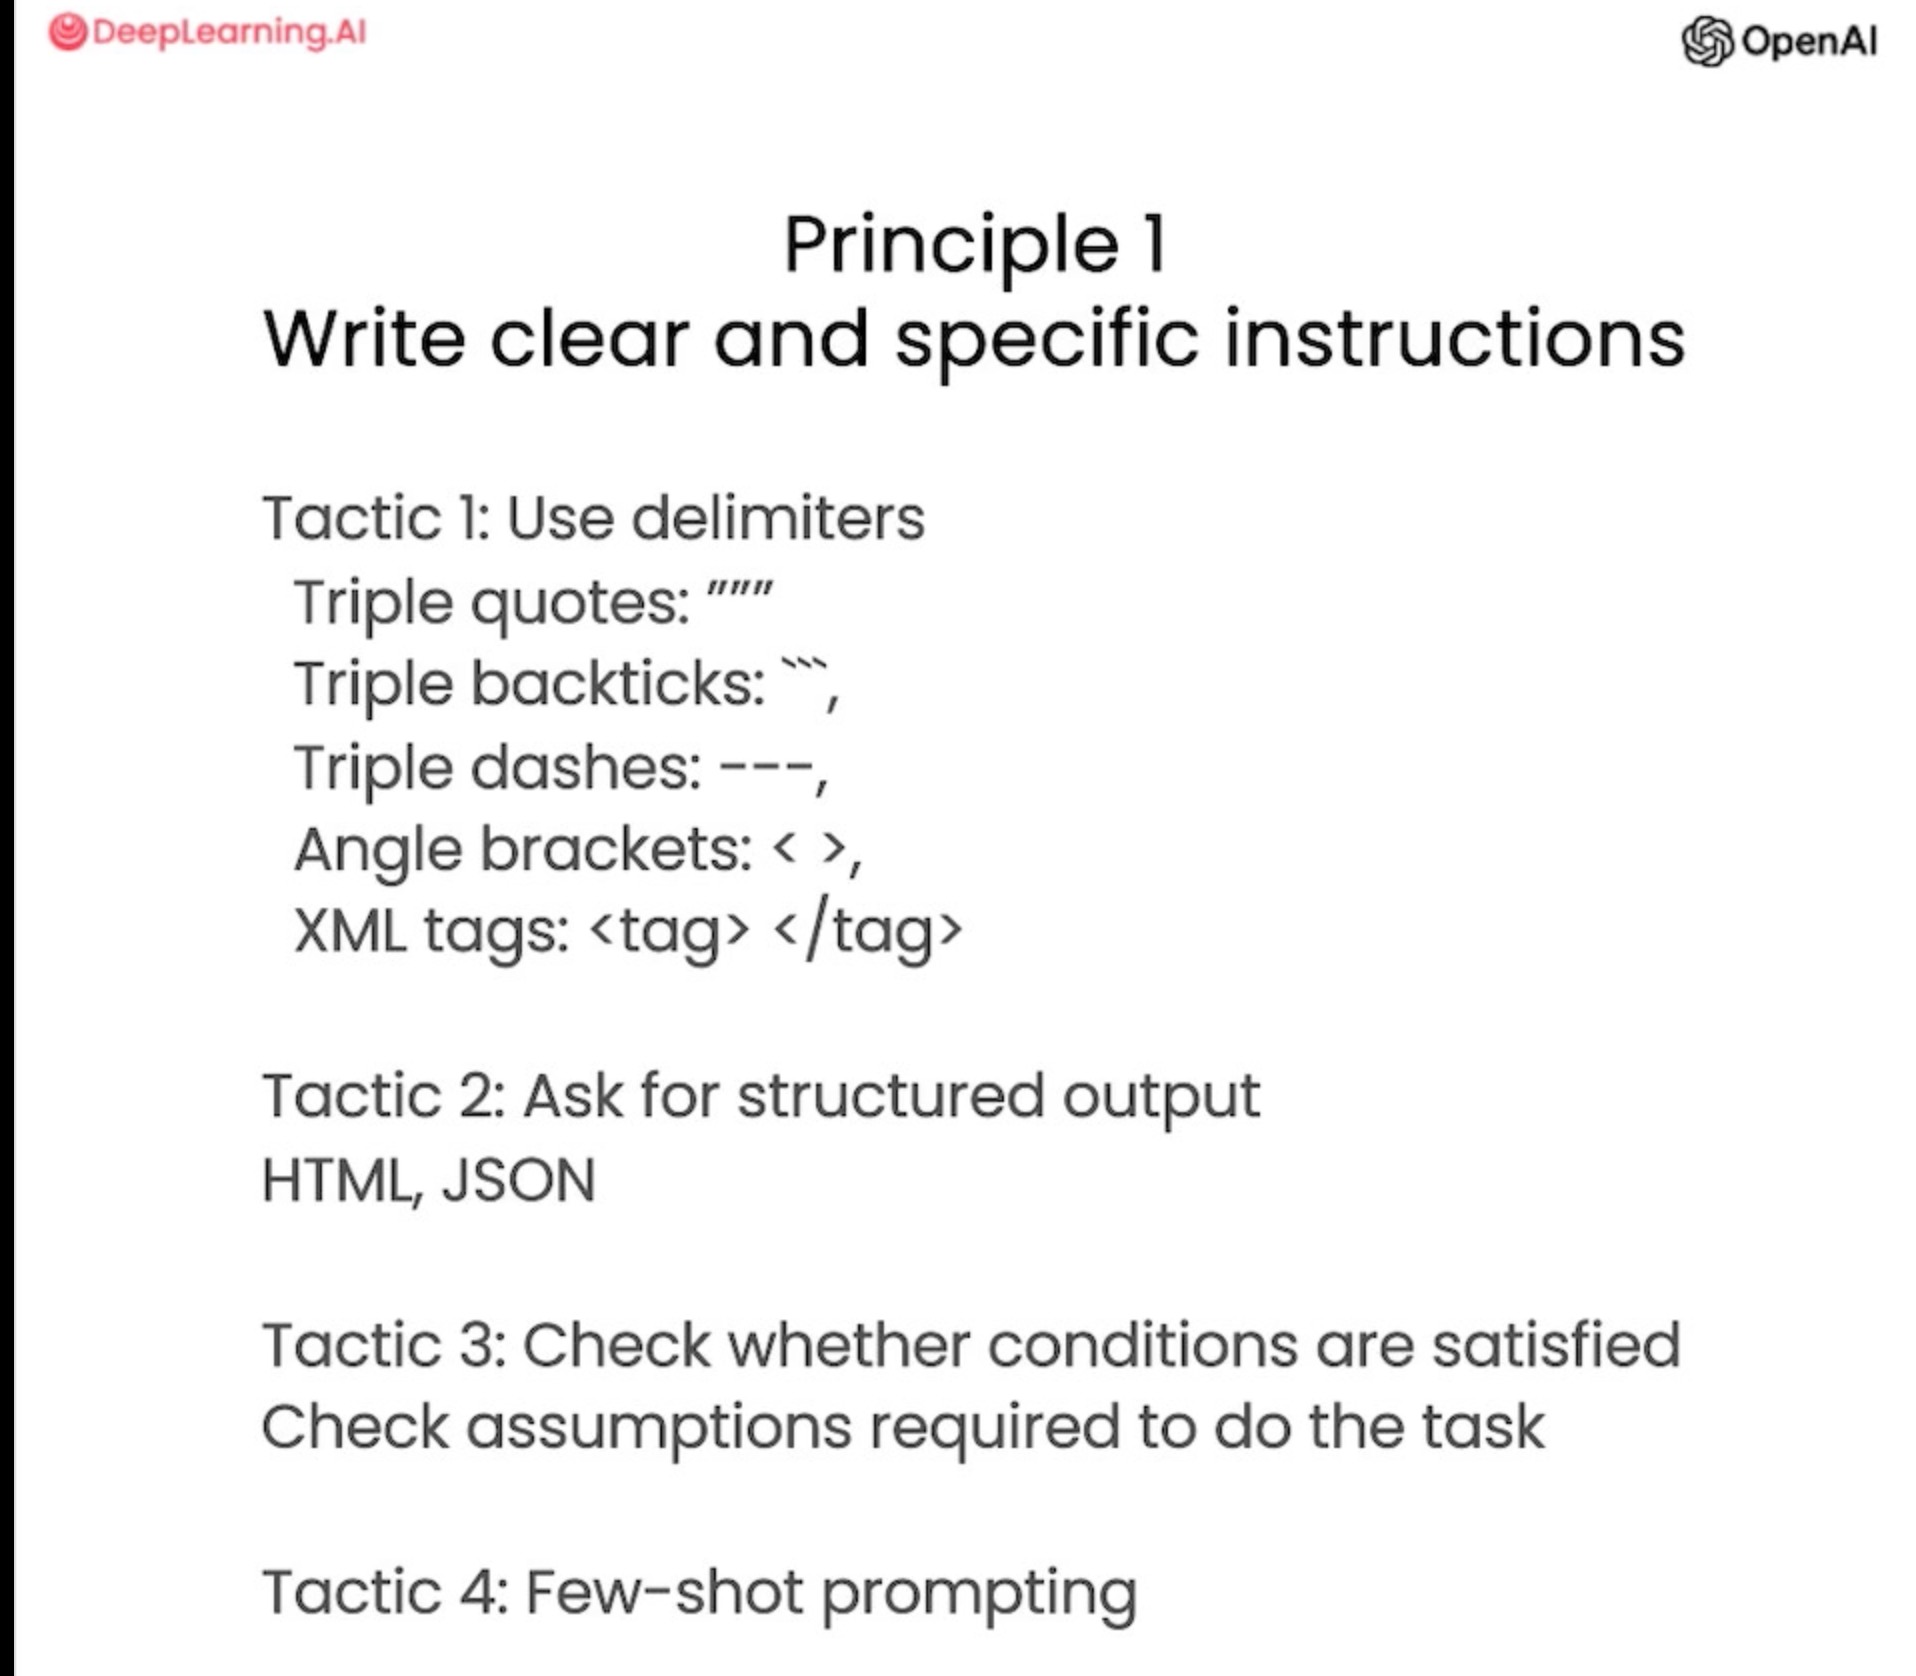

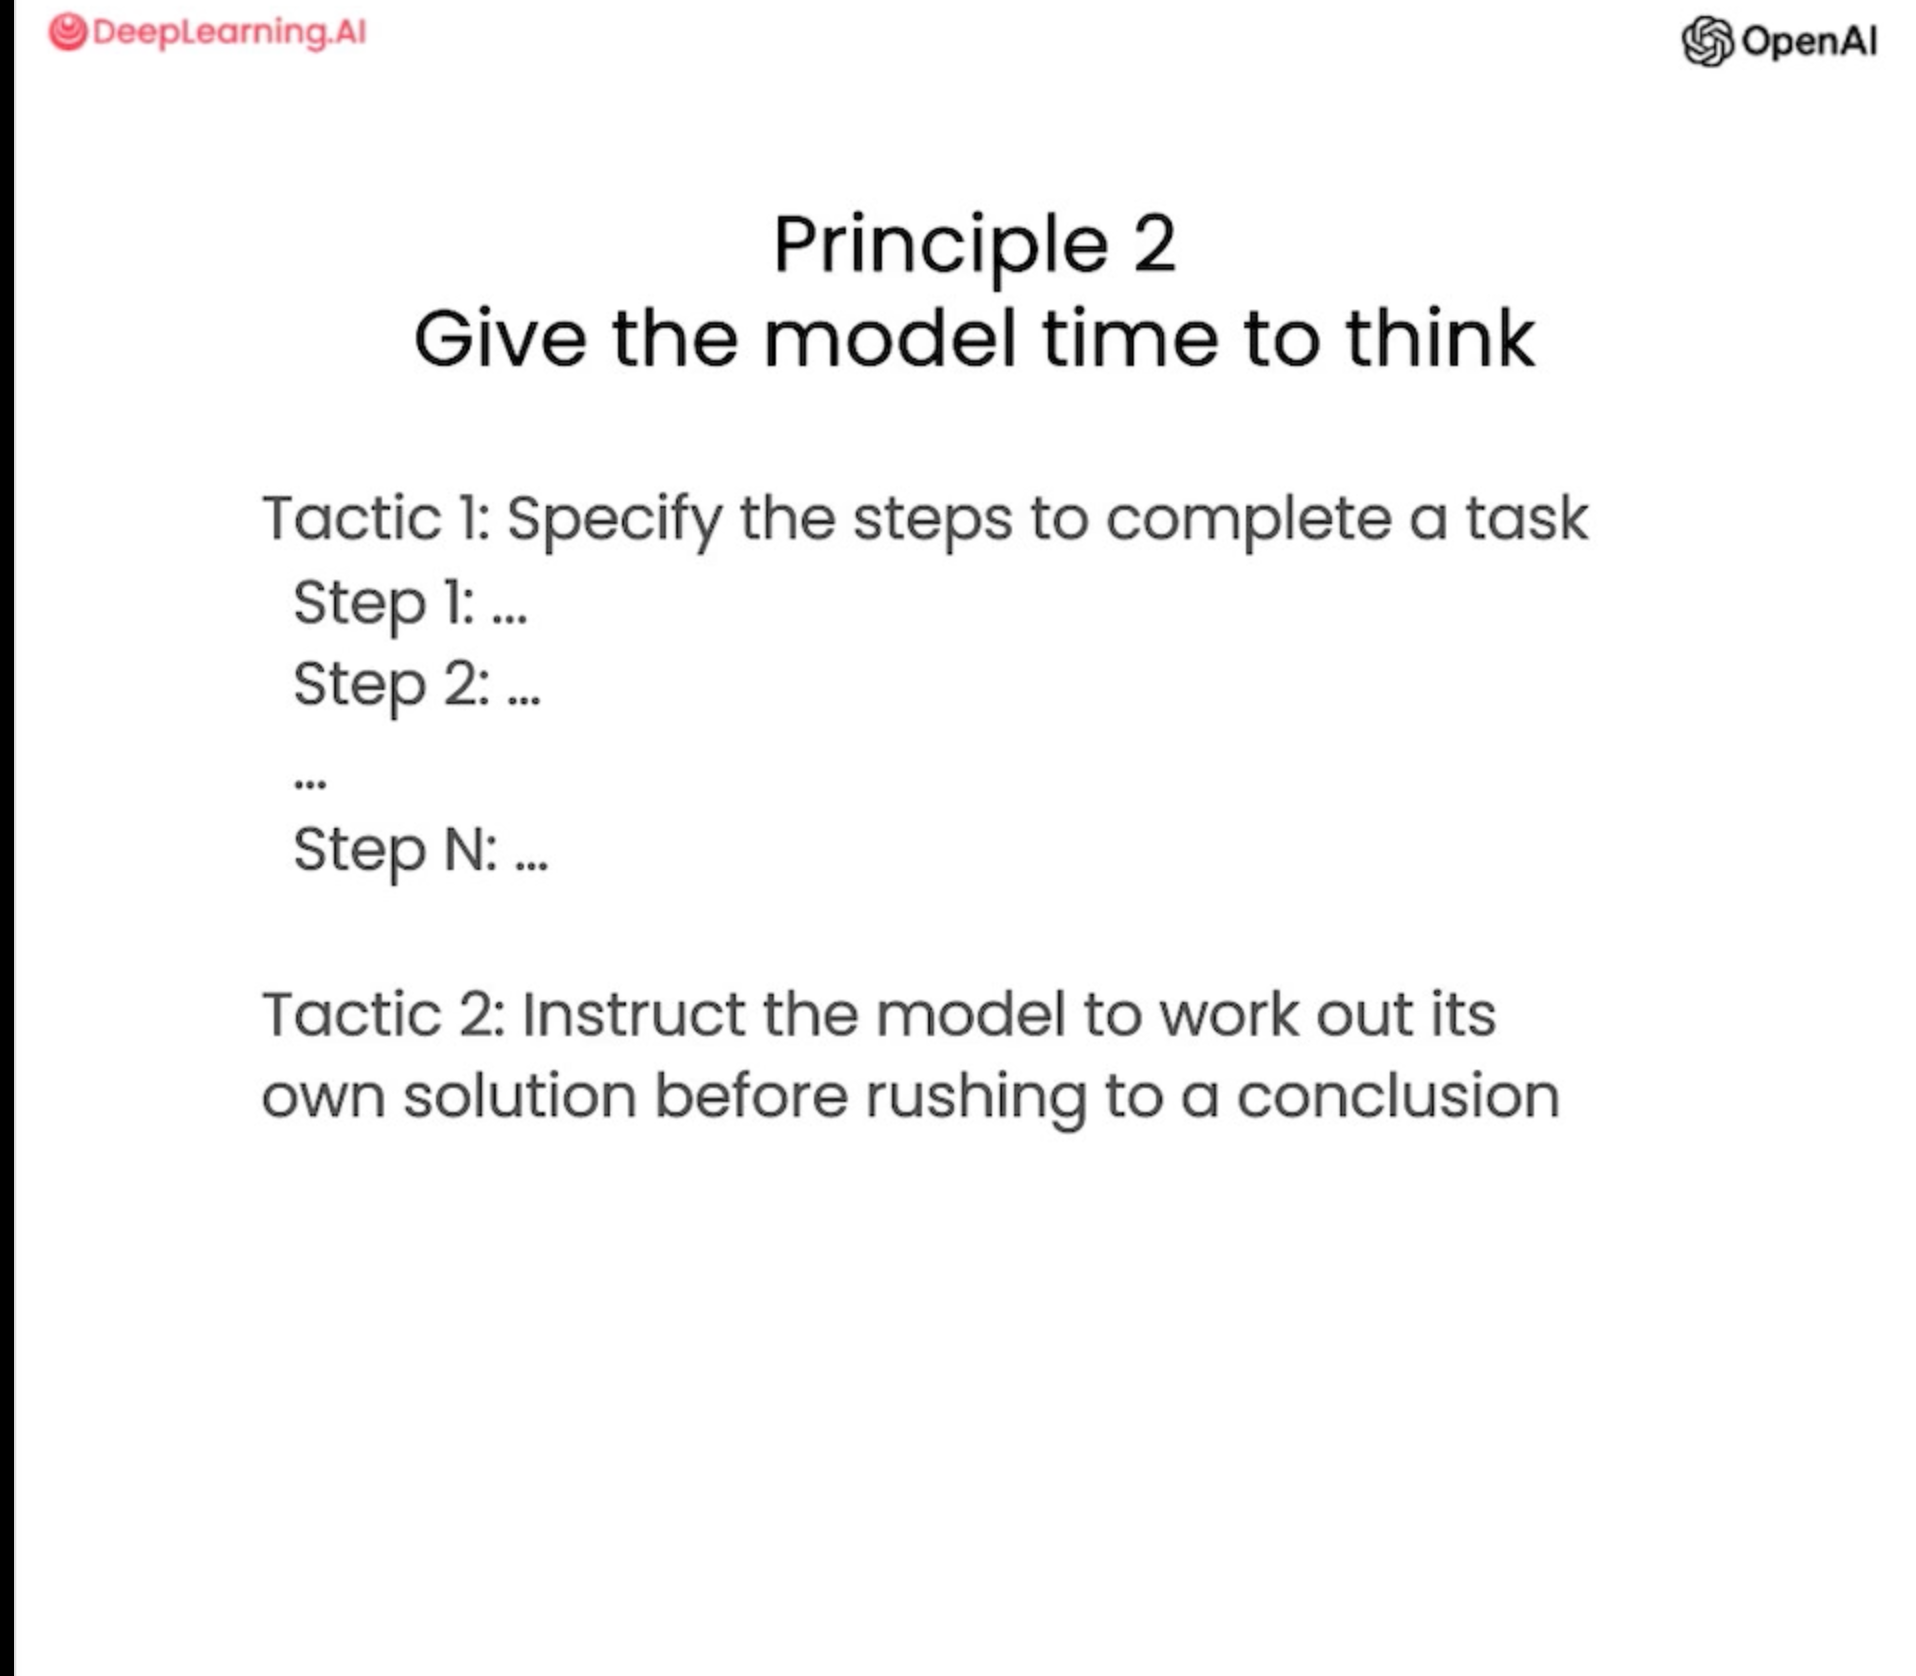

In [2]:
!pip install openai --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 32.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 18.2 MB/s eta 0:00:00


In [ ]:
import openai
import os

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv())

openai.api_key  = os.getenv('OPENAI_API_KEY')

#### helper function
Throughout this course, we will use OpenAI's `gpt-3.5-turbo` model and the [chat completions endpoint](https://platform.openai.com/docs/guides/chat). 

This helper function will make it easier to use prompts and look at the generated outputs:

In [ ]:
def get_completion(prompt, model="gpt-3.5-turbo"):
    messages = [{"role": "user", "content": prompt}]
    response = openai.ChatCompletion.create(
        model=model,
        messages=messages,
        temperature=0, # this is the degree of randomness of the model's output
    )
    return response.choices[0].message["content"]

## Prompting Principles
- **Principle 1: Write clear and specific instructions**
- **Principle 2: Give the model time to “think”**

### Tactics

#### Tactic 1: Use delimiters to clearly indicate distinct parts of the input
- Delimiters can be anything like: ```, """, < >, `<tag> </tag>`, `:`

In [ ]:
text = f"""
You should express what you want a model to do by \ 
providing instructions that are as clear and \ 
specific as you can possibly make them. \ 
This will guide the model towards the desired output, \ 
and reduce the chances of receiving irrelevant \ 
or incorrect responses. Don't confuse writing a \ 
clear prompt with writing a short prompt. \ 
In many cases, longer prompts provide more clarity \ 
and context for the model, which can lead to \ 
more detailed and relevant outputs.
"""
prompt = f"""
Summarize the text delimited by triple backticks \ 
into a single sentence.
```{text}```
"""
response = get_completion(prompt)
print(response)

#### Tactic 2: Ask for a structured output
- JSON, HTML

In [ ]:
prompt = f"""
Generate a list of three made-up book titles along \ 
with their authors and genres. 
Provide them in JSON format with the following keys: 
book_id, title, author, genre.
"""
response = get_completion(prompt)
print(response)

#### Tactic 3: Ask the model to check whether conditions are satisfied

In [ ]:
text_1 = f"""
Making a cup of tea is easy! First, you need to get some \ 
water boiling. While that's happening, \ 
grab a cup and put a tea bag in it. Once the water is \ 
hot enough, just pour it over the tea bag. \ 
Let it sit for a bit so the tea can steep. After a \ 
few minutes, take out the tea bag. If you \ 
like, you can add some sugar or milk to taste. \ 
And that's it! You've got yourself a delicious \ 
cup of tea to enjoy.
"""
prompt = f"""
You will be provided with text delimited by triple quotes. 
If it contains a sequence of instructions, \ 
re-write those instructions in the following format:

Step 1 - ...
Step 2 - …
…
Step N - …

If the text does not contain a sequence of instructions, \ 
then simply write \"No steps provided.\"

\"\"\"{text_1}\"\"\"
"""
response = get_completion(prompt)
print("Completion for Text 1:")
print(response)

In [ ]:
text_2 = f"""
The sun is shining brightly today, and the birds are \
singing. It's a beautiful day to go for a \ 
walk in the park. The flowers are blooming, and the \ 
trees are swaying gently in the breeze. People \ 
are out and about, enjoying the lovely weather. \ 
Some are having picnics, while others are playing \ 
games or simply relaxing on the grass. It's a \ 
perfect day to spend time outdoors and appreciate the \ 
beauty of nature.
"""
prompt = f"""
You will be provided with text delimited by triple quotes. 
If it contains a sequence of instructions, \ 
re-write those instructions in the following format:

Step 1 - ...
Step 2 - …
…
Step N - …

If the text does not contain a sequence of instructions, \ 
then simply write \"No steps provided.\"

\"\"\"{text_2}\"\"\"
"""
response = get_completion(prompt)
print("Completion for Text 2:")
print(response)

#### Tactic 4: "Few-shot" prompting

In [ ]:
prompt = f"""
Your task is to answer in a consistent style.

<child>: Teach me about patience.

<grandparent>: The river that carves the deepest \ 
valley flows from a modest spring; the \ 
grandest symphony originates from a single note; \ 
the most intricate tapestry begins with a solitary thread.

<child>: Teach me about resilience.
"""
response = get_completion(prompt)
print(response)

### Principle 2: Give the model time to “think” 

#### Tactic 1: Specify the steps required to complete a task

In [ ]:
text = f"""
In a charming village, siblings Jack and Jill set out on \ 
a quest to fetch water from a hilltop \ 
well. As they climbed, singing joyfully, misfortune \ 
struck—Jack tripped on a stone and tumbled \ 
down the hill, with Jill following suit. \ 
Though slightly battered, the pair returned home to \ 
comforting embraces. Despite the mishap, \ 
their adventurous spirits remained undimmed, and they \ 
continued exploring with delight.
"""
# example 1
prompt_1 = f"""
Perform the following actions: 
1 - Summarize the following text delimited by triple \
backticks with 1 sentence.
2 - Translate the summary into French.
3 - List each name in the French summary.
4 - Output a json object that contains the following \
keys: french_summary, num_names.

Separate your answers with line breaks.

Text:
```{text}```
"""
response = get_completion(prompt_1)
print("Completion for prompt 1:")
print(response)

#### Ask for output in a specified format

In [ ]:
prompt_2 = f"""
Your task is to perform the following actions: 
1 - Summarize the following text delimited by 
  <> with 1 sentence.
2 - Translate the summary into French.
3 - List each name in the French summary.
4 - Output a json object that contains the 
  following keys: french_summary, num_names.

Use the following format:
Text: <text to summarize>
Summary: <summary>
Translation: <summary translation>
Names: <list of names in Italian summary>
Output JSON: <json with summary and num_names>

Text: <{text}>
"""
response = get_completion(prompt_2)
print("\nCompletion for prompt 2:")
print(response)

#### Tactic 2: Instruct the model to work out its own solution before rushing to a conclusion

In [ ]:
prompt = f"""
Determine if the student's solution is correct or not.

Question:
I'm building a solar power installation and I need \
 help working out the financials. 
- Land costs $100 / square foot
- I can buy solar panels for $250 / square foot
- I negotiated a contract for maintenance that will cost \ 
me a flat $100k per year, and an additional $10 / square \
foot
What is the total cost for the first year of operations 
as a function of the number of square feet.

Student's Solution:
Let x be the size of the installation in square feet.
Costs:
1. Land cost: 100x
2. Solar panel cost: 250x
3. Maintenance cost: 100,000 + 100x
Total cost: 100x + 250x + 100,000 + 100x = 450x + 100,000
"""
response = get_completion(prompt)
print(response)

#### Note that the student's solution is actually not correct.
#### We can fix this by instructing the model to work out its own solution first.

In [ ]:
prompt = f"""
Your task is to determine if the student's solution \
is correct or not.
To solve the problem do the following:
- First, work out your own solution to the problem. 
- Then compare your solution to the student's solution \ 
and evaluate if the student's solution is correct or not. 
Don't decide if the student's solution is correct until 
you have done the problem yourself.

Use the following format:
Question:
```
question here
```
Student's solution:
```
student's solution here
```
Actual solution:
```
steps to work out the solution and your solution here
```
Is the student's solution the same as actual solution \
just calculated:
```
yes or no
```
Student grade:
```
correct or incorrect
```

Question:
```
I'm building a solar power installation and I need help \
working out the financials. 
- Land costs $100 / square foot
- I can buy solar panels for $250 / square foot
- I negotiated a contract for maintenance that will cost \
me a flat $100k per year, and an additional $10 / square \
foot
What is the total cost for the first year of operations \
as a function of the number of square feet.
``` 
Student's solution:
```
Let x be the size of the installation in square feet.
Costs:
1. Land cost: 100x
2. Solar panel cost: 250x
3. Maintenance cost: 100,000 + 100x
Total cost: 100x + 250x + 100,000 + 100x = 450x + 100,000
```
Actual solution:
"""
response = get_completion(prompt)
print(response)

## Model Limitations: Hallucinations
- Boie is a real company, the product name is not real.

In [ ]:
prompt = f"""
Tell me about AeroGlide UltraSlim Smart Toothbrush by Boie
"""
response = get_completion(prompt)
print(response)

## Try experimenting on your own!

In [ ]:
#### Notes on using the OpenAI API outside of this classroom

To install the OpenAI Python library:
```
!pip install openai
```

The library needs to be configured with your account's secret key, which is available on the [website](https://platform.openai.com/account/api-keys). 

You can either set it as the `OPENAI_API_KEY` environment variable before using the library:
 ```
 !export OPENAI_API_KEY='sk-...'
 ```

Or, set `openai.api_key` to its value:

```
import openai
openai.api_key = "sk-..."

#### A note about the backslash
- In the course, we are using a backslash `\` to make the text fit on the screen without inserting newline '\n' characters.
- GPT-3 isn't really affected whether you insert newline characters or not.  But when working with LLMs in general, you may consider whether newline characters in your prompt may affect the model's performance.